In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.enable_eager_execution()

In [3]:
from data_utils import load_mnist
from models import CapsuleModel
from training import train

import operations as ops

Using TensorFlow backend.


In [4]:
N = 9

#ensure the network doesnt sample from architecture values not represented by the graph
alpha = np.ones(shape=(len(ops.OPERATIONS), N, N-1),)*-10

#build architecture
for i in range(N):
    for j in range(i):
        for o in range((len(ops.OPERATIONS))):
            alpha[o,i,j] = np.random.randn()
alpha = tf.cast(alpha, dtype=tf.float32)
architecture = tf.get_variable('architecture', dtype=tf.float32, initializer=alpha)

model = CapsuleModel(N=N)

In [6]:
loss = train(model, data=load_mnist(flat=False), architecture=architecture, batch_size=16, num_batches=16)

................

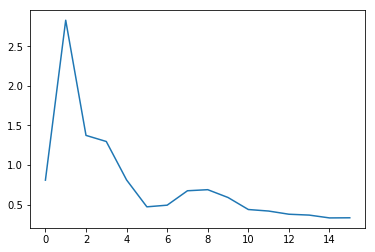

In [10]:
plt.plot(loss['train'])

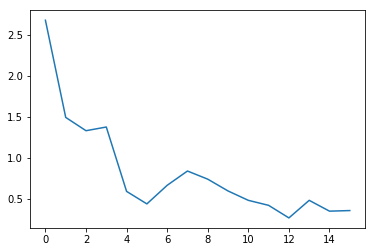

In [8]:
plt.plot(loss['val'])

In [12]:
preds = np.argmax(model(x, architecture), axis=1)
acc = preds==y
np.sum(acc)/16

0.625